In [1]:

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
import pandas as pd
import numpy as np

In [4]:
import random
np.random.seed(1234)
random.seed(1234)

In [5]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
submission_df = pd.read_csv('./data/sample_submission.csv')

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [9]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [10]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [11]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
categories = all_df.columns[all_df.dtypes == 'object']
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [14]:
all_df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [15]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype(int)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [16]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [17]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [18]:
import lightgbm as lgb

In [19]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [20]:
lgb_params = {  
    'objective': 'regression',
    
    
    "random_seed":1234
}

train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)

train_y = train_df_le["SalePrice"]

In [21]:
train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)

train_y = train_df_le["SalePrice"]

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
from lightgbm.callback import early_stopping

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_y.iloc[train_index]
    y_valid = train_y.iloc[val_index]
    
    lgb_train =lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    
    model_lgb = lgb.train(lgb_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100,
                        callbacks=[lgb.early_stopping(stopping_rounds=20,  first_metric_only=True)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index]=y_pred


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2936
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 71
[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid_0's l2: 5.49567e+08
Evaluated only: l2
0.12808166643890737
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2959
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 71
[LightGBM] [Info] Start training from score 180923.739979
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[83]	valid_0's l2: 9.5631e+08

In [24]:
sum(rmses)/len(rmses)

0.13844911189656198

In [25]:
from statistics import mean
mean(rmses)

0.138449111896562

In [26]:
actual_pred_df=pd.DataFrame({"actual":train_y, "pred":oof})

<Axes: >

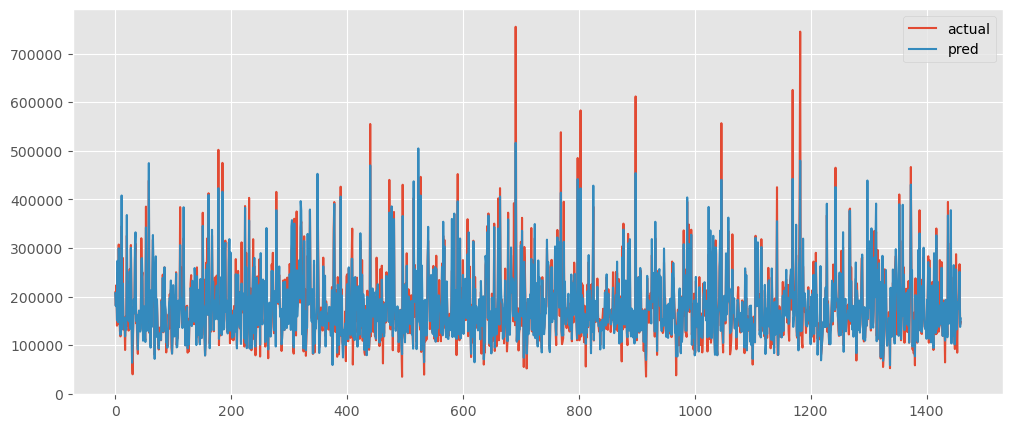

In [27]:
actual_pred_df.plot(figsize=(12,5))

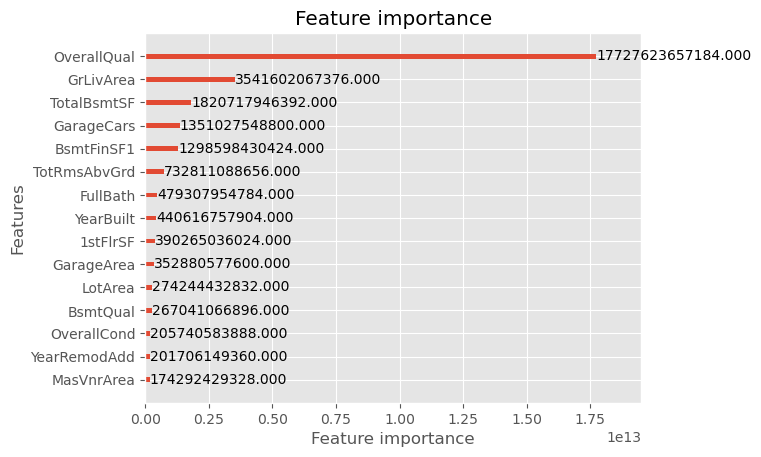

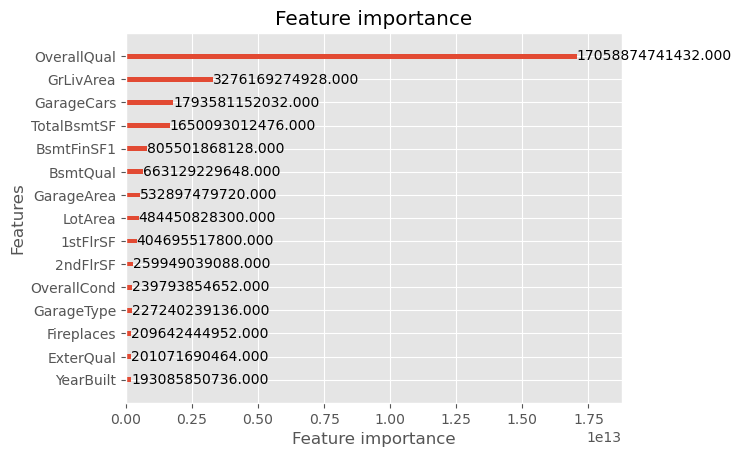

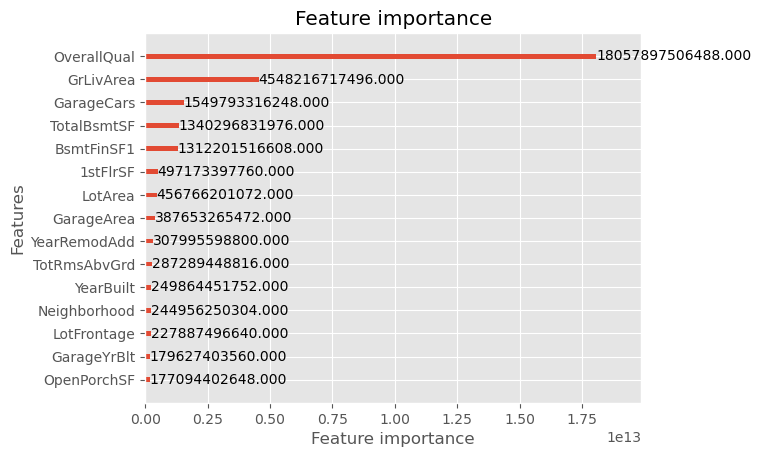

In [28]:
for model in models:
    lgb.plot_importance(model,importance_type="gain", max_num_features=15)

In [29]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

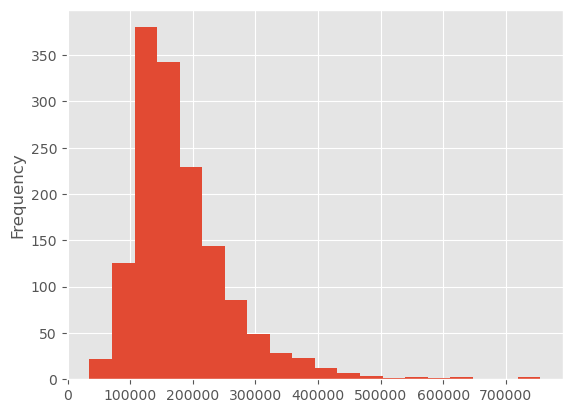

In [30]:
train_df["SalePrice"].plot.hist(bins=20)

In [31]:
np.log(train_df["SalePrice"])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

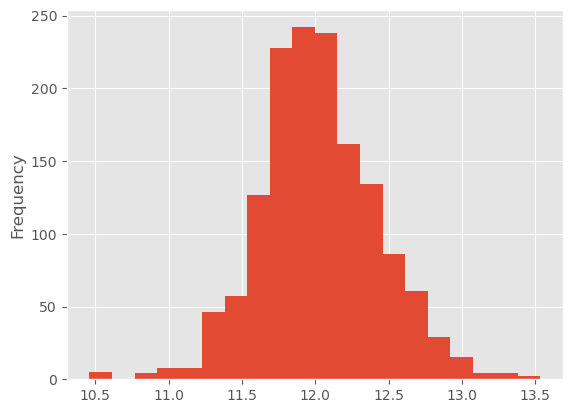

In [32]:
np.log(train_df["SalePrice"]).plot.hist(bins=20)

In [33]:
train_df_copy = train_df.copy()
train_df_copy["SalePrice_log"] = np.log(train_df_copy["SalePrice"])


In [34]:
train_X = train_df_copy.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_copy["SalePrice_log"]

In [35]:
from sklearn.preprocessing import LabelEncoder

for col in train_X.columns:
    if train_X[col].dtype == 'object':
        le = LabelEncoder()
        train_X[col] = le.fit_transform(train_X[col].astype(str))


In [36]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train =lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    
    model_lgb = lgb.train(lgb_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100,
                        callbacks=[lgb.early_stopping(stopping_rounds=20,  first_metric_only=True)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index]=y_pred


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2936
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 71
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's l2: 0.0164478
Evaluated only: l2
0.010831989511713403
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2959
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 71
[LightGBM] [Info] Start training from score 12.025976
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.0220529
Evaluated

In [37]:
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)

In [38]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [39]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

In [40]:
all_df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [41]:
all_df.loc[~all_df["PoolQC"].isnull(),"PoolQC"]=1
all_df.loc[all_df["PoolQC"].isnull(),"PoolQC"]=0

In [42]:
all_df.PoolQC.value_counts()

0    2909
1      10
Name: PoolQC, dtype: int64

In [43]:
all_df.loc[~all_df["MiscFeature"].isnull(),"MiscFeature"]=1
all_df.loc[all_df["MiscFeature"].isnull(),"MiscFeature"]=0

In [44]:
all_df.loc[~all_df["Alley"].isnull(),"Alley"]=1
all_df.loc[all_df["Alley"].isnull(),"Alley"]=0

In [45]:
HighFacility_col = ["PoolQC", "MiscFeature", "Alley"]
for col in HighFacility_col:
    if all_df[col].dtype == "object":
        if len(all_df[all_df[col].isnull()])>0:
            all_df.loc[~all_df[col].isnull(),col]=1
            all_df.loc[all_df[col].isnull(),col]=0

In [46]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [47]:
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int)

In [48]:
all_df["hasHighFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64

In [49]:
all_df = all_df.drop(["PoolQC","MiscFeature","Alley"],axis=1)

In [50]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [51]:
train_df_num = train_df.select_dtypes(include=[np.number])

In [52]:
nonratio_feature = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt",
                    "YearRemodAdd", "MoSold", "YrSold"]

In [53]:
num_features = sorted(list(set(train_df_num)- set(nonratio_feature)))

In [54]:
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [55]:
train_df_num_rs = train_df_num[num_features]

In [56]:
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [57]:
for col in num_features:
    if train_df_num_rs[col].nunique()<15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


In [58]:
for col in num_features:
    tmp_df = train_df_num_rs[
        (train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std() * 3) |
        (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std() * 3)
    ]
    print(col, len(tmp_df))


1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

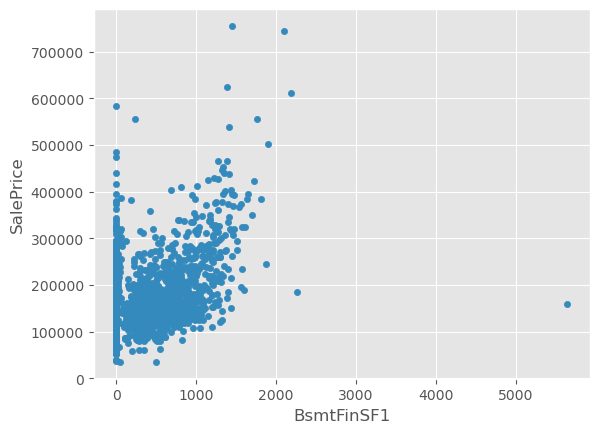

In [59]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [60]:
all_df[all_df["BsmtFinSF1"]>5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

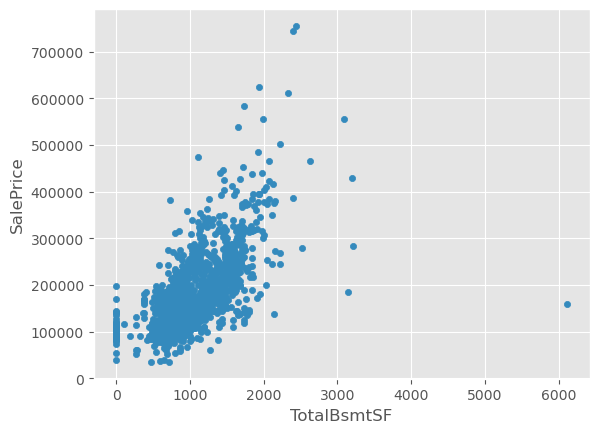

In [61]:
all_df.plot.scatter(x="TotalBsmtSF", y="SalePrice")

In [62]:
all_df[all_df["TotalBsmtSF"]>6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

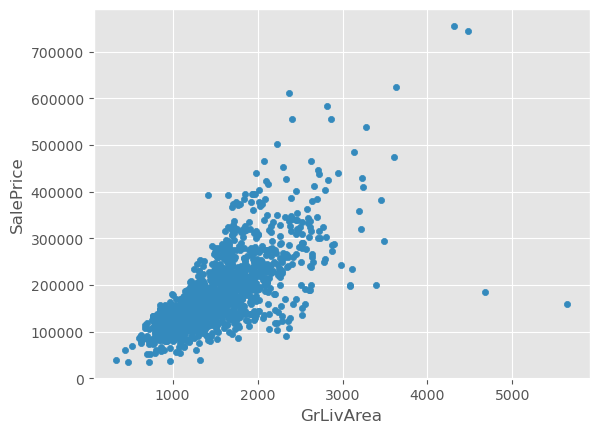

In [63]:
all_df.plot.scatter(x="GrLivArea", y="SalePrice")

In [64]:
all_df[all_df["GrLivArea"]>5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

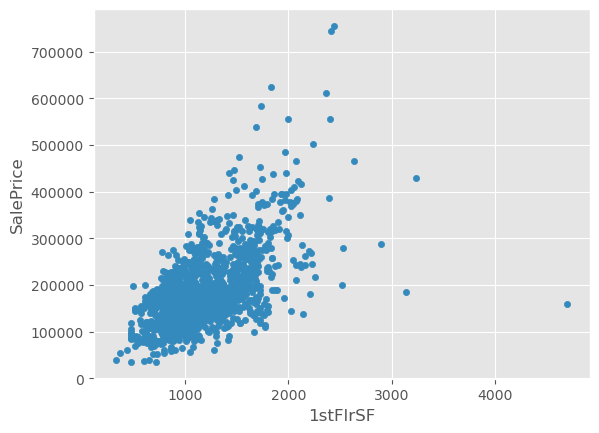

In [65]:
all_df.plot.scatter(x="1stFlrSF", y="SalePrice")

In [66]:
all_df[all_df["1stFlrSF"]>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


In [67]:
all_df = all_df[(all_df['BsmtFinSF1']<2000)|(all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['TotalBsmtSF']<3000)|(all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['GrLivArea']<4500)|(all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['1stFlrSF']<2500)|(all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['LotArea']<100000)|(all_df['SalePrice'].isnull())]

In [68]:
categories = categories.drop(["PoolQC", "MiscFeature", "Alley"])

In [69]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [70]:
# trainとtestのデータを作成
train_df_le = all_df[~all_df["SalePrice"].isnull()].copy()
test_df_le = all_df[all_df["SalePrice"].isnull()].copy()

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

# SalePriceの対数をとったものを新しい変数に保存
train_Y = np.log(train_df_le["SalePrice"])

# 不要な列を削除して、特徴量のみのDataFrameを作成
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)


In [71]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train =lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    
    model_lgb = lgb.train(lgb_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100,
                        callbacks=[lgb.early_stopping(stopping_rounds=20,  first_metric_only=True)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index]=y_pred


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2949
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 72
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0161791
Evaluated only: l2
0.010778212639136617
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2943
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 72
[LightGBM] [Info] Start training from score 12.018820
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0193847
Evaluate

In [72]:
from sklearn.model_selection import train_test_split
import optuna

In [73]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234,
                                                    shuffle=False, stratify=None)

In [74]:
def objective(trial):
    params = {
        "objective":"regression",
        "random_seed":1234,
        "learning_rate":0.05,
        "n_estimators":1000,
        
        "num_leaves":trial.suggest_int("num_leaves",4,64),
        "max_bin":trial.suggest_int("max_bin",50,100),
        "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
        "bagging_freq":trial.suggest_int("bagging_freq",1,10),
        "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
        "min_data_in_leaf":trial.suggest_int("min_data_in_leaf",2,16),
        "min_sum_hessian_in_leaf":trial.suggest_int("min_sum_hessian_in_leaf",1,10),
    }
    
    lgb_train = lgb.Dataset(X_train,y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    model_lgb = lgb.train(params, lgb_train, valid_sets=lgb_eval, num_boost_round=100,
                        callbacks=[lgb.early_stopping(stopping_rounds=20,  first_metric_only=True)])
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    score = np.sqrt(mean_squared_error(y_valid, y_pred))

    
    return score

In [75]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2023-08-18 16:15:50,579] A new study created in memory with name: no-name-fbda6cf7-756d-442b-99c8-bb176326d915
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1747
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[134]	valid_0's l2: 0.0152389
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1910
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No furth

C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:51,096] Trial 1 finished with value: 0.11937272450220825 and parameters: {'num_leaves': 58, 'max_bin': 9

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:51,181] Trial 2 finished with value: 0.11927029259428742 and parameters: {'num_leaves': 8, 'max_bin': 54

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:51,480] Trial 3 finished with value: 0.12003657605439665 and parameters: {'num_leaves': 52, 'max_bin': 73, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 2, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 2 with value: 0.11927029259428742.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\a

Early stopping, best iteration is:
[196]	valid_0's l2: 0.0144088
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[158]	valid_0's l2: 0.0141258
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:51,792] Trial 5 finished with value: 0.12453593400931307 and parameters: {'num_leaves': 41, 'max_bin': 8

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[90]	valid_0's l2: 0.0155092
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:52,001] Trial 6 finished with value: 0.12295019080802583 and parameters: {'num_leaves': 46, 'max_bin': 53, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 7, 'feature_fraction': 0.5051912805369205, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11885219540133281.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\an

Early stopping, best iteration is:
[128]	valid_0's l2: 0.0151167
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[129]	valid_0's l2: 0.0145127
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:52,325] Trial 8 finished with value: 0.12270622539348934 and parameters: {'num_leaves': 43, 'max_bin': 6

Early stopping, best iteration is:
[128]	valid_0's l2: 0.0150568
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0141361
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1575
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 76
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:52,700] Trial 10 finished with value: 0.12511794017648378 and parameters: {'num_leaves': 63, 'max_bin': 

Early stopping, best iteration is:
[153]	valid_0's l2: 0.0156545
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1468
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 76
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[192]	valid_0's l2: 0.0147717
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning]

C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:52,958] Trial 12 finished with value: 0.11876079203601964 and parameters: {'num_leaves': 38, 'max_bin': 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0141041
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.

[I 2023-08-18 16:15:53,124] Trial 13 finished with value: 0.12203196178984498 and parameters: {'num_leaves': 44, 'max_bin': 56, 'bagging_fraction': 0.7581636020592828, 'bagging_freq': 3, 'feature_fraction': 0.49159568100355844, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 12 with value: 0.11876079203601964.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\nota

Early stopping, best iteration is:
[115]	valid_0's l2: 0.0148918
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1235
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:53,446] Trial 15 finished with value: 0.1237507383365794 and parameters: {'num_leaves': 39, 'max_bin': 8

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0153142
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:53,642] Trial 16 finished with value: 0.1236443225053351 and parameters: {'num_leaves': 46, 'max_bin': 65, 'bagging_fraction': 0.8068989098512387, 'bagging_freq': 4, 'feature_fraction': 0.8405515985555808, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 14 with value: 0.11756825138402327.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\

Early stopping, best iteration is:
[120]	valid_0's l2: 0.0152879
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1747
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[101]	valid_0's l2: 0.015478
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:53,944] Trial 18 finished with value: 0.1195625993336444 and parameters: {'num_leaves': 5, 'max_bin': 65

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[327]	valid_0's l2: 0.0142952
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:54,078] Trial 19 finished with value: 0.11952939220434775 and parameters: {'num_leaves': 22, 'max_bin': 79, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 6, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 14 with value: 0.11756825138402327.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar

Early stopping, best iteration is:
[128]	valid_0's l2: 0.0142873
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1505
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1749
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:54,556] Trial 21 finished with value: 0.12876048289581654 and parameters: {'num_leaves': 60, 'max_bin': 86, 'bagging_fraction': 0.8994235032839333, 'bagging_freq': 2, 'feature_fraction': 0.8340630286841071, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 14 with value: 0.11756825138402327.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\

Early stopping, best iteration is:
[129]	valid_0's l2: 0.0165793
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1839
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[219]	valid_0's l2: 0.0138893
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:54,869] Trial 23 finished with value: 0.12496659126417248 and parameters: {'num_leaves': 31, 'max_bin': 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1751
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 76
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[124]	valid_0's l2: 0.0156166
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 76
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:55,074] Trial 24 finished with value: 0.1248844619122459 and parameters: {'num_leaves': 48, 'max_bin': 58, 'bagging_fraction': 0.6605183031020647, 'bagging_freq': 1, 'feature_fraction': 0.49999826244820006, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 8}. Best is trial 14 with value: 0.11756825138402327.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\

Early stopping, best iteration is:
[133]	valid_0's l2: 0.0155961
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1494
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[146]	valid_0's l2: 0.0139965
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:55,415] Trial 26 finished with value: 0.12257821950681011 and parameters: {'num_leaves': 39, 'max_bin': 

Early stopping, best iteration is:
[162]	valid_0's l2: 0.0150254
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[116]	valid_0's l2: 0.0147068
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:55,658] Trial 28 finished with value: 0.11945273799638403 and parameters: {'num_leaves': 17, 'max_bin': 

Early stopping, best iteration is:
[118]	valid_0's l2: 0.014269
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[154]	valid_0's l2: 0.0144251
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:55,990] Trial 30 finished with value: 0.12159562324835835 and parameters: {'num_leaves': 64, 'max_bin': 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-08-18 16:15:56,201] Trial 31 finished with value: 0.12373668128256352 and parameters: {'num_leaves': 27, 'max_bin': 80, 'bagging_fraction': 0.8155242276180952, 'bagging_freq': 7, 'feature_fraction': 0.8363253277236977, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 8}. Best is trial 14 with value: 0.11756825138402327.


Early stopping, best iteration is:
[149]	valid_0's l2: 0.0153108
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1909
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:56,427] Trial 32 finished with value: 0.11793224339711926 and parameters: {'num_leaves': 15, 'max_bin': 

Early stopping, best iteration is:
[174]	valid_0's l2: 0.013908
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1613
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0135396
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:56,625] Trial 33 finished with value: 0.11635980968246047 and parameters: {'num_leaves': 17, 'max_bin': 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1654
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[160]	valid_0's l2: 0.0141209
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:57,019] Trial 35 finished with value: 0.1187709977380514 and parameters: {'num_leaves': 28, 'max_bin': 7

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1639
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0141065
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:57,221] Trial 36 finished with value: 0.1260952034189212 and parameters: {'num_leaves': 50, 'max_bin': 88, 'bagging_fraction': 0.8518598698729667, 'bagging_freq': 1, 'feature_fraction': 0.6760962349612033, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 33 with value: 0.11635980968246047.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar

Early stopping, best iteration is:
[111]	valid_0's l2: 0.0159
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[181]	valid_0's l2: 0.0145026
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:57,514] Trial 38 finished with value: 0.12047749141287004 and parameters: {'num_leaves': 21, 'max_bin': 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[108]	valid_0's l2: 0.0145148
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:57,816] Trial 39 finished with value: 0.12566646531537162 and parameters: {'num_leaves': 62, 'max_bin': 61, 'bagging_fraction': 0.8746594112078407, 'bagging_freq': 10, 'feature_fraction': 0.7996012936761958, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 33 with value: 0.11635980968246047.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\nota

Early stopping, best iteration is:
[151]	valid_0's l2: 0.0157921
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1839
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[158]	valid_0's l2: 0.0142171
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:58,174] Trial 41 finished with value: 0.11738759502958811 and parameters: {'num_leaves': 33, 'max_bin': 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1598
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[122]	valid_0's l2: 0.0137798
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No furth

[I 2023-08-18 16:15:58,334] Trial 42 finished with value: 0.12514438314121398 and parameters: {'num_leaves': 35, 'max_bin': 61, 'bagging_fraction': 0.44892224224701704, 'bagging_freq': 9, 'feature_fraction': 0.8864597445115652, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 10}. Best is trial 33 with value: 0.11635980968246047.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\not

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-08-18 16:15:58,595] Trial 43 finished with value: 0.12012510963847618 and parameters: {'num_leaves': 51, 'max_bin': 66, 'bagging_fraction': 0.4405506949939984, 'bagging_freq': 5, 'feature_fraction': 0.5161170710854714, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 1}. Best is trial 33 with value: 0.11635980968246047.


Early stopping, best iteration is:
[105]	valid_0's l2: 0.01443
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:58,894] Trial 44 finished with value: 0.12025778349206802 and parameters: {'num_leaves': 48, 'max_bin': 

Early stopping, best iteration is:
[166]	valid_0's l2: 0.0144619
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[148]	valid_0's l2: 0.0149022
Evaluated only: l2


C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-08-18 16:15:59,193] Trial 46 finished with value: 0.11962722564464623 and parameters: {'num_leaves': 7, 'max_bin': 6

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[215]	valid_0's l2: 0.0143107
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:59,359] Trial 47 finished with value: 0.12107399298927853 and parameters: {'num_leaves': 27, 'max_bin': 59, 'bagging_fraction': 0.7942727561532594, 'bagging_freq': 1, 'feature_fraction': 0.7484986208624937, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 33 with value: 0.11635980968246047.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar

Early stopping, best iteration is:
[99]	valid_0's l2: 0.0146589
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 75
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-08-18 16:15:59,593] Trial 48 finished with value: 0.11951240869741948 and parameters: {'num_leaves': 19, 'max_bin': 69, 'bagging_fraction': 0.6937998175981945, 'bagging_freq': 3, 'feature_fraction': 0.5854263996089444, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 33 with value: 0.11635980968246047.
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
C:\Users\notar\AppData\Local\Temp\ipykernel_27772\3093358294.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
c:\Users\notar\

Early stopping, best iteration is:
[241]	valid_0's l2: 0.0142832
Evaluated only: l2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 74
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[189]	valid_0's l2: 0.0147427
Evaluated only: l2


{'num_leaves': 17,
 'max_bin': 76,
 'bagging_fraction': 0.4128313590272658,
 'bagging_freq': 3,
 'feature_fraction': 0.6123427343757532,
 'min_data_in_leaf': 7,
 'min_sum_hessian_in_leaf': 5}

In [76]:
test_X = test_df_le.drop(["SalePrice","Id"],axis=1)

In [77]:
preds = []

for models in models:
    pred = model.predict(test_X)
    preds.append(pred)

ValueError: train and valid dataset categorical_feature do not match.